In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings # supress warnings 
warnings.filterwarnings('ignore')

# **Data Preprocessing**

In [ ]:
data_NYISO = pd.read_csv('Data.csv',low_memory=False)
data_NYISO['DateTime']=pd.to_datetime(data_NYISO.DateTime)
# add day, month, year, hour, minute, day of the week
data_NYISO['Year'] = data_NYISO['DateTime'].dt.year
data_NYISO['Month'] = data_NYISO['DateTime'].dt.month
data_NYISO['Day'] = data_NYISO['DateTime'].dt.day
data_NYISO['Hour'] = data_NYISO['DateTime'].dt.hour
data_NYISO['Minute'] = data_NYISO['DateTime'].dt.minute
data_NYISO["dayofweek"] = data_NYISO['DateTime'].dt.dayofweek
data_NYISO = data_NYISO.set_index(['DateTime'])
data_NYISO.head()

,ZoneName,Load,RT_LMP,RT_MCL,RT_MCC,DA_LMP,DA_MCL,DA_MCC,T2M,T2MDEW,...,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,Year,Month,Day,Hour,Minute,dayofweek
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01,West,1574.9854,23.15,-0.67,0.0,13.91,-0.16,-1.54,-0.92,-4.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,0,4
2021-01-01,Genesee,1009.6906,23.37,-0.45,0.0,13.48,-0.23,-1.17,-3.30,-4.48,...,0.0,0.0,0.0,0.0,2021,1,1,0,0,4
2021-01-01,Central,1646.5823,24.08,0.26,0.0,14.16,0.14,-1.48,-2.98,-3.22,...,0.0,0.0,0.0,0.0,2021,1,1,0,0,4
2021-01-01,North,643.6438,23.18,-0.64,0.0,12.17,-0.36,0.00,-7.42,-9.52,...,0.0,0.0,0.0,0.0,2021,1,1,0,0,4
2021-01-01,Mohawk Valley,861.0112,24.44,0.62,0.0,14.52,0.34,-1.64,-5.31,-5.39,...,0.0,0.0,0.0,0.0,2021,1,1,0,0,4


In [ ]:
df = data_NYISO[data_NYISO.ZoneName=='New York City'].drop('ZoneName', axis=1)
df

,Load,RT_LMP,RT_MCL,RT_MCC,DA_LMP,DA_MCL,DA_MCC,T2M,T2MDEW,T2MWET,...,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,Year,Month,Day,Hour,Minute,dayofweek
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,4915.3086,26.08,2.26,0.00,22.88,1.29,-9.05,1.95,-0.59,0.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,0,4
2021-01-01 00:05:00,4892.8174,29.15,2.38,0.00,22.88,1.29,-9.05,1.95,-0.59,0.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,5,4
2021-01-01 00:10:00,4868.1533,53.87,1.06,-40.86,22.88,1.29,-9.05,1.95,-0.59,0.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,10,4
2021-01-01 00:15:00,4856.5923,36.92,1.10,-23.80,22.88,1.29,-9.05,1.95,-0.59,0.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,15,4
2021-01-01 00:20:00,4829.3720,32.00,0.90,-21.37,22.88,1.29,-9.05,1.95,-0.59,0.68,...,0.0,0.0,0.0,0.0,2021,1,1,0,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-03 23:35:00,4868.6230,22.42,2.06,0.00,21.15,1.61,-4.33,3.47,2.74,3.10,...,0.0,0.0,0.0,0.0,2021,1,3,23,35,6
2021-01-03 23:40:00,4845.6846,22.45,2.06,0.00,21.15,1.61,-4.33,3.47,2.74,3.10,...,0.0,0.0,0.0,0.0,2021,1,3,23,40,6
2021-01-03 23:45:00,4834.3022,22.33,2.01,0.00,21.15,1.61,-4.33,3.47,2.74,3.10,...,0.0,0.0,0.0,0.0,2021,1,3,23,45,6


In [ ]:
# relocate the target variable to the last column
df = df.reindex(columns = [col for col in df.columns if col != 'RT_LMP'] + ['RT_LMP'])
df.head()

,Load,RT_MCL,RT_MCC,DA_LMP,DA_MCL,DA_MCC,T2M,T2MDEW,T2MWET,QV2M,...,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,Year,Month,Day,Hour,Minute,dayofweek,RT_LMP
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,4915.3086,2.26,0.00,22.88,1.29,-9.05,1.95,-0.59,0.68,3.54,...,0.0,0.0,0.0,2021,1,1,0,0,4,26.08
2021-01-01 00:05:00,4892.8174,2.38,0.00,22.88,1.29,-9.05,1.95,-0.59,0.68,3.54,...,0.0,0.0,0.0,2021,1,1,0,5,4,29.15
2021-01-01 00:10:00,4868.1533,1.06,-40.86,22.88,1.29,-9.05,1.95,-0.59,0.68,3.54,...,0.0,0.0,0.0,2021,1,1,0,10,4,53.87
2021-01-01 00:15:00,4856.5923,1.10,-23.80,22.88,1.29,-9.05,1.95,-0.59,0.68,3.54,...,0.0,0.0,0.0,2021,1,1,0,15,4,36.92
2021-01-01 00:20:00,4829.3720,0.90,-21.37,22.88,1.29,-9.05,1.95,-0.59,0.68,3.54,...,0.0,0.0,0.0,2021,1,1,0,20,4,32.00


# **Data Prepration**

## **3D Data**

In [ ]:
TRAIN_SPLIT=int(len(df)*0.8)
df_array=np.array(df)

In [ ]:
def multivariate_data(df, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(df) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(df[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [ ]:
past_history = 10
STEP = 1 #stride #do not change 
n_step = 1 #target_len

x_train_multi, y_train_multi= multivariate_data(df_array, df_array[:,-1],
                                                0, TRAIN_SPLIT, past_history,
                                                n_step, STEP,
                                                single_step=False)
x_test_multi, y_test_multi = multivariate_data(df_array, df_array[:,-1],
                                               TRAIN_SPLIT, None, past_history,
                                               n_step, STEP,
                                               single_step=False)

In [ ]:
print(x_train_multi.shape)
print(x_test_multi.shape)

(681, 10, 31)
(162, 10, 31)


In [ ]:
print(y_train_multi.shape)
print(y_test_multi.shape)

(681, 1)
(162, 1)


## **Data Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalers = {}
for i in range(x_train_multi.shape[1]):
    scalers [i]= MinMaxScaler(feature_range=(0,1))
    x_train_multi[:, i, :] = scalers[i].fit_transform(x_train_multi[:, i, :])

for i in range(x_test_multi.shape[1]):
    x_test_multi[:, i, :] = scalers[i].transform(x_test_multi[:, i, :])
print(x_train_multi.shape)
print(x_test_multi.shape)

(681, 10, 31)
(162, 10, 31)


In [ ]:
scaler_y =MinMaxScaler(feature_range=(0,1))
y_train_multi=scaler_y.fit_transform(y_train_multi)
y_test_multi=scaler_y.transform(y_test_multi)
print(y_train_multi.shape)
print(y_test_multi.shape)

(681, 1)
(162, 1)


In [ ]:
y_test_multi_inv=scaler_y.inverse_transform(y_test_multi)
print(y_test_multi_inv.shape)

(162, 1)


## **2D Data**

In [ ]:
x_train_multi_2d=x_train_multi.reshape(x_train_multi.shape[0], x_train_multi.shape[1]*x_train_multi.shape[2])
x_test_multi_2d=x_test_multi.reshape(x_test_multi.shape[0], x_test_multi.shape[1]*x_test_multi.shape[2])
print(x_train_multi_2d.shape)
print(x_test_multi_2d.shape)

(681, 310)
(162, 310)


# **Machine Learning Models**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

##**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression().fit(x_train_multi_2d, y_train_multi)

In [ ]:
predict_Reg = Reg.predict(x_test_multi_2d)
mse_Reg = mean_squared_error(y_test_multi, predict_Reg)
print(predict_Reg.shape)
print(mse_Reg)

(162, 1)
0.021131026199725907


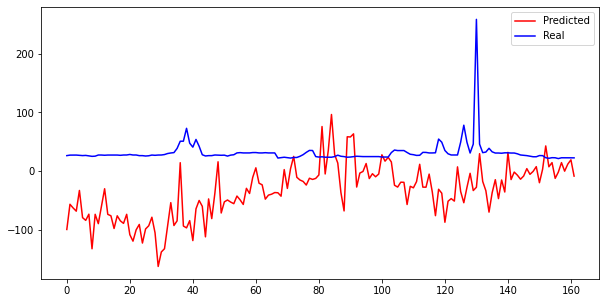

In [ ]:
predict_Reg_inv=scaler_y.inverse_transform(predict_Reg)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_Reg_inv[:, 0], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real')
plt.legend()

##**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
param_gridlasso = {
    'alpha': [0, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
lasso = Lasso()
grid_searchlasso = GridSearchCV(estimator = lasso, param_grid = param_gridlasso, cv = 4,
                             verbose = 3, scoring='neg_mean_squared_error')
Lasso=grid_searchlasso.fit(x_train_multi_2d, y_train_multi)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END ..........................alpha=0;, score=-0.002 total time=   0.2s
[CV 2/4] END ..........................alpha=0;, score=-0.031 total time=   0.2s
[CV 3/4] END ..........................alpha=0;, score=-0.005 total time=   0.2s
[CV 4/4] END ..........................alpha=0;, score=-0.006 total time=   0.2s
[CV 1/4] END ......................alpha=0.001;, score=-0.001 total time=   0.0s
[CV 2/4] END ......................alpha=0.001;, score=-0.015 total time=   0.0s
[CV 3/4] END ......................alpha=0.001;, score=-0.001 total time=   0.0s
[CV 4/4] END ......................alpha=0.001;, score=-0.000 total time=   0.0s
[CV 1/4] END ........................alpha=0.1;, score=-0.000 total time=   0.0s
[CV 2/4] END ........................alpha=0.1;, score=-0.016 total time=   0.0s
[CV 3/4] END ........................alpha=0.1;, score=-0.002 total time=   0.0s
[CV 4/4] END ........................alpha=0.1;,

In [ ]:
predict_Lasso = Lasso.predict(x_test_multi_2d).reshape(-1, 1)
mse_Lasso= mean_squared_error(y_test_multi, predict_Lasso)
print(predict_Lasso.shape)
print(mse_Lasso)

(162, 1)
0.001897889448491943


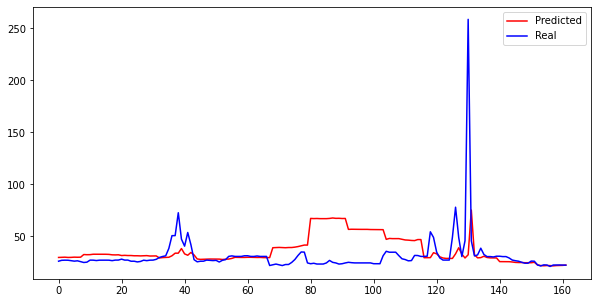

In [ ]:
predict_Lasso_inv=scaler_y.inverse_transform(predict_Lasso)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_Lasso_inv[:, 0], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real')
plt.legend()

##**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
param_gridridge = {
    'alpha': [0, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
ridge = Ridge()
grid_searchridge = GridSearchCV(estimator = ridge, param_grid = param_gridridge, cv = 4,
                             verbose = 3, scoring='neg_mean_squared_error')
Ridge=grid_searchridge.fit(x_train_multi_2d, y_train_multi)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END ..........................alpha=0;, score=-0.101 total time=   0.1s
[CV 2/4] END ..........................alpha=0;, score=-0.092 total time=   0.1s
[CV 3/4] END ..........................alpha=0;, score=-0.018 total time=   0.1s
[CV 4/4] END ..........................alpha=0;, score=-0.016 total time=   0.1s
[CV 1/4] END ......................alpha=0.001;, score=-0.016 total time=   0.0s
[CV 2/4] END ......................alpha=0.001;, score=-0.052 total time=   0.0s
[CV 3/4] END ......................alpha=0.001;, score=-0.005 total time=   0.0s
[CV 4/4] END ......................alpha=0.001;, score=-0.006 total time=   0.0s
[CV 1/4] END ........................alpha=0.1;, score=-0.002 total time=   0.0s
[CV 2/4] END ........................alpha=0.1;, score=-0.017 total time=   0.0s
[CV 3/4] END ........................alpha=0.1;, score=-0.003 total time=   0.0s
[CV 4/4] END ........................alpha=0.1;,

In [ ]:
predict_Ridge = Ridge.predict(x_test_multi_2d).reshape(-1, 1)
mse_Ridge= mean_squared_error(y_test_multi, predict_Ridge)
print(predict_Ridge.shape)
print(mse_Ridge)

(162, 1)
0.0034740130295406717


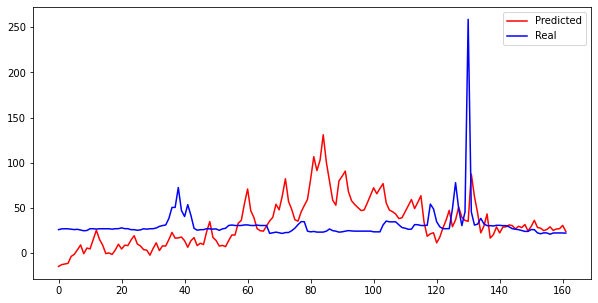

In [ ]:
predict_Ridge_inv=scaler_y.inverse_transform(predict_Ridge)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_Ridge_inv[:, 0], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real')
plt.legend()

##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
param_gridrf = {
    'max_depth': [20],
    'max_features' : [100, 300],
    'min_samples_leaf': [15, 20],
    'min_samples_split': [50, 100],
    'n_estimators': [50, 100]
}
rf = RandomForestRegressor(random_state = 123)
grid_searchrf = GridSearchCV(estimator = rf, param_grid = param_gridrf, cv = 4,
                             verbose = 3, scoring='neg_mean_squared_error')
RF=grid_searchrf.fit(x_train_multi_2d, y_train_multi)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 1/4] END max_depth=20, max_features=100, min_samples_leaf=15, min_samples_split=50, n_estimators=50;, score=-0.001 total time=   0.4s
[CV 2/4] END max_depth=20, max_features=100, min_samples_leaf=15, min_samples_split=50, n_estimators=50;, score=-0.014 total time=   0.4s
[CV 3/4] END max_depth=20, max_features=100, min_samples_leaf=15, min_samples_split=50, n_estimators=50;, score=-0.002 total time=   0.4s
[CV 4/4] END max_depth=20, max_features=100, min_samples_leaf=15, min_samples_split=50, n_estimators=50;, score=-0.000 total time=   0.4s
[CV 1/4] END max_depth=20, max_features=100, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=-0.001 total time=   0.7s
[CV 2/4] END max_depth=20, max_features=100, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, score=-0.014 total time=   0.7s
[CV 3/4] END max_depth=20, max_features=100, min_samples_leaf=15, min_samples_split=50, n_estimators=100;, sc

In [ ]:
predict_RF = RF.predict(x_test_multi_2d).reshape(-1, 1)
mse_RF= mean_squared_error(y_test_multi, predict_RF)
print(predict_RF.shape)
print(mse_RF)

(162, 1)
0.0013735196564093207


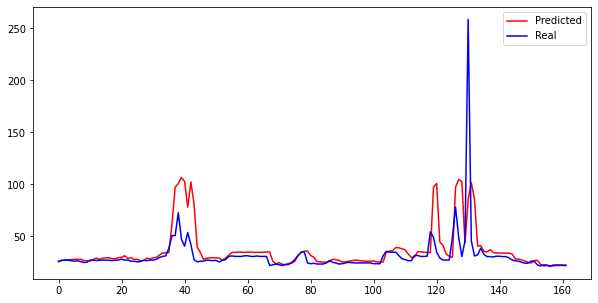

In [ ]:
predict_RF_inv=scaler_y.inverse_transform(predict_RF)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_RF_inv[:, 0], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real')
plt.legend()

##**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
param_gridgb = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
                'n_estimators' : [10, 50, 100, 200],
                'learning_rate' : [0.01, 0.05, 0.1],
                'max_features' : ['auto', 'sqrt', 'log2']}
gb = GradientBoostingRegressor(random_state = 123)
grid_searchgb = GridSearchCV(estimator = gb, param_grid = param_gridgb, cv = 4, 
                             verbose = 3)
GB=grid_searchgb.fit(x_train_multi_2d, y_train_multi)

Fitting 4 folds for each of 144 candidates, totalling 576 fits
[CV 1/4] END learning_rate=0.01, loss=squared_error, max_features=auto, n_estimators=10;, score=-1.377 total time=   0.2s
[CV 2/4] END learning_rate=0.01, loss=squared_error, max_features=auto, n_estimators=10;, score=-0.016 total time=   0.2s
[CV 3/4] END learning_rate=0.01, loss=squared_error, max_features=auto, n_estimators=10;, score=0.054 total time=   0.2s
[CV 4/4] END learning_rate=0.01, loss=squared_error, max_features=auto, n_estimators=10;, score=-8.804 total time=   0.2s
[CV 1/4] END learning_rate=0.01, loss=squared_error, max_features=auto, n_estimators=50;, score=-0.408 total time=   0.8s
[CV 2/4] END learning_rate=0.01, loss=squared_error, max_features=auto, n_estimators=50;, score=0.010 total time=   0.8s
[CV 3/4] END learning_rate=0.01, loss=squared_error, max_features=auto, n_estimators=50;, score=0.147 total time=   0.8s
[CV 4/4] END learning_rate=0.01, loss=squared_error, max_features=auto, n_estimators=5

In [ ]:
predict_GB = GB.predict(x_test_multi_2d).reshape(-1, 1)
mse_GB = mean_squared_error(y_test_multi, predict_GB)
print(predict_GB.shape)
print(mse_GB)

(162, 1)
0.0010447898094320743


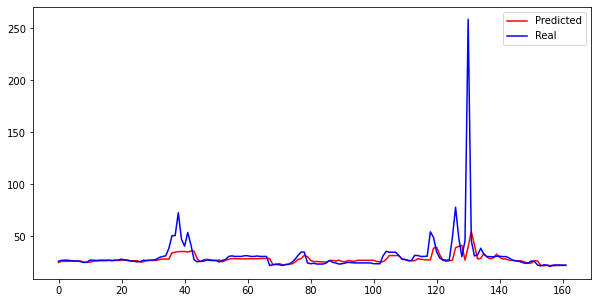

In [ ]:
predict_GB_inv=scaler_y.inverse_transform(predict_GB)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_GB_inv[:, ], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real')
plt.legend()

##**XGBoost**

In [ ]:
from xgboost import XGBRegressor
param_grid_xgb = {'max_depth': [10, 20],
        'colsample_bytree' : [0, 0.1],
        'n_estimators': [1000],
        'objective':['reg:squarederror'],
        'seed': [123]}
xgb = XGBRegressor()
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid = param_grid_xgb, cv = 4, 
                               verbose = 3, scoring='neg_mean_squared_error')
XGB = grid_search_xgb.fit(x_train_multi_2d, y_train_multi)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END colsample_bytree=0, max_depth=10, n_estimators=1000, objective=reg:squarederror, seed=123;, score=-0.001 total time=   1.2s
[CV 2/4] END colsample_bytree=0, max_depth=10, n_estimators=1000, objective=reg:squarederror, seed=123;, score=-0.016 total time=   1.1s
[CV 3/4] END colsample_bytree=0, max_depth=10, n_estimators=1000, objective=reg:squarederror, seed=123;, score=-0.002 total time=   0.9s
[CV 4/4] END colsample_bytree=0, max_depth=10, n_estimators=1000, objective=reg:squarederror, seed=123;, score=-0.001 total time=   0.8s
[CV 1/4] END colsample_bytree=0, max_depth=20, n_estimators=1000, objective=reg:squarederror, seed=123;, score=-0.001 total time=   0.8s
[CV 2/4] END colsample_bytree=0, max_depth=20, n_estimators=1000, objective=reg:squarederror, seed=123;, score=-0.016 total time=   0.8s
[CV 3/4] END colsample_bytree=0, max_depth=20, n_estimators=1000, objective=reg:squarederror, seed=123;, score=-0.002 

In [ ]:
predict_XGB = XGB.predict(x_test_multi_2d).reshape(-1, 1)
mse_XGB = mean_squared_error(y_test_multi, predict_XGB)
print(predict_XGB.shape)
print(mse_XGB)

(162, 1)
0.00402567711044486


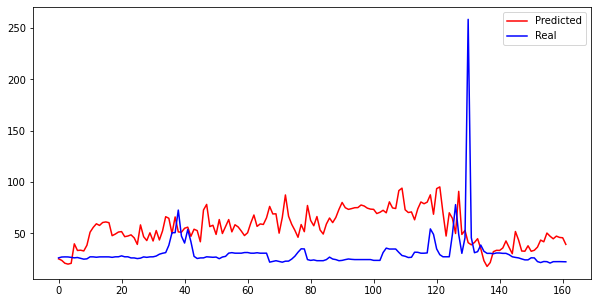

In [ ]:
predict_XGB_inv=scaler_y.inverse_transform(predict_XGB)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_XGB_inv[:, ], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real')
plt.legend()

##**SVR**

In [ ]:
from sklearn.svm import SVR
param_grid_svm = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                  'epsilon': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1], 
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'gamma': ['scale', 'auto']}
svr = SVR()
grid_search_svr = GridSearchCV(estimator=svr, param_grid = param_grid_svm, cv = 4, 
                               verbose = 3, scoring='neg_mean_squared_error')
SVR = grid_search_svr.fit(x_train_multi_2d, y_train_multi)

Fitting 4 folds for each of 800 candidates, totalling 3200 fits
[CV 1/4] END C=0.1, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.000 total time=   0.0s
[CV 2/4] END C=0.1, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.014 total time=   0.0s
[CV 3/4] END C=0.1, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.002 total time=   0.0s
[CV 4/4] END C=0.1, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.003 total time=   0.1s
[CV 1/4] END C=0.1, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.004 total time=   0.0s
[CV 2/4] END C=0.1, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.015 total time=   0.0s
[CV 3/4] END C=0.1, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.003 total time=   0.0s
[CV 4/4] END C=0.1, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.000 total time=   0.0s
[CV 1/4] END C=0.1, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 2/4] END C=0.1, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.015 total time=   0.0s


In [ ]:
predict_SVR = SVR.predict(x_test_multi_2d).reshape(-1, 1)
mse_SVR = mean_squared_error(y_test_multi, predict_SVR)
print(predict_SVR.shape)
print(mse_SVR)

(162, 1)
0.003075273101120397


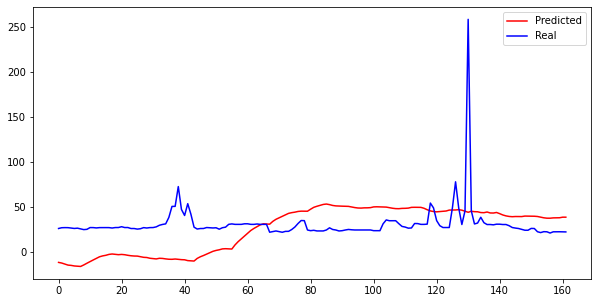

In [ ]:
predict_SVR_inv=scaler_y.inverse_transform(predict_SVR)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_SVR_inv[:, ], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real')
plt.legend()

##**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
param_grid_knn = {'n_neighbors': [5, 10, 15, 20],
                  'weights': ['uniform', 'distance'], 
                  'leaf_size': [30, 60, 90],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1, 2]}
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn, param_grid = param_grid_knn, cv = 4, 
                               verbose = 3, scoring='neg_mean_squared_error')
KNN = grid_search_knn.fit(x_train_multi_2d, y_train_multi)

Fitting 4 folds for each of 192 candidates, totalling 768 fits
[CV 1/4] END algorithm=auto, leaf_size=30, n_neighbors=5, p=1, weights=uniform;, score=-0.000 total time=   0.0s
[CV 2/4] END algorithm=auto, leaf_size=30, n_neighbors=5, p=1, weights=uniform;, score=-0.016 total time=   0.0s
[CV 3/4] END algorithm=auto, leaf_size=30, n_neighbors=5, p=1, weights=uniform;, score=-0.002 total time=   0.0s
[CV 4/4] END algorithm=auto, leaf_size=30, n_neighbors=5, p=1, weights=uniform;, score=-0.000 total time=   0.0s
[CV 1/4] END algorithm=auto, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=-0.000 total time=   0.0s
[CV 2/4] END algorithm=auto, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=-0.016 total time=   0.0s
[CV 3/4] END algorithm=auto, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=-0.002 total time=   0.0s
[CV 4/4] END algorithm=auto, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=-0.000 total time=   0.0s
[CV 1/4] END algorithm=auto, 

In [ ]:
predict_KNN = KNN.predict(x_test_multi_2d).reshape(-1, 1)
mse_KNN = mean_squared_error(y_test_multi, predict_KNN)
print(predict_KNN.shape)
print(mse_KNN)

(162, 1)
0.0024312616561913995


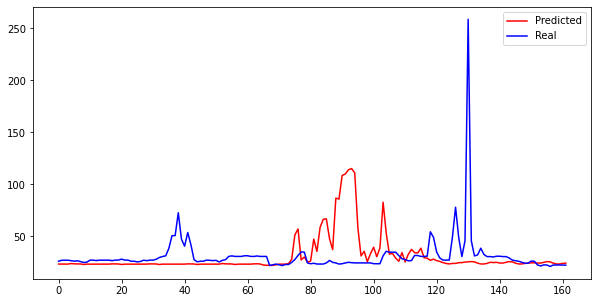

In [ ]:
predict_KNN_inv=scaler_y.inverse_transform(predict_KNN)
fig = plt.figure(figsize = (10, 5))
plt.plot(predict_KNN_inv[:, ], color='r', label='Predicted')
plt.plot(y_test_multi_inv[:, 0], color='b', label='Real')
plt.legend()

#**Result Comparision**

In [ ]:
result_ML={'Linear Regression': mse_Reg,
           'Lasso Regression': mse_Lasso,
           'Ridge Regression': mse_Ridge,
           'Random Forest': mse_RF,
           'Gradient Boosting': mse_GB,
           'XGBoost': mse_XGB,
           'SVR': mse_SVR,
           'KNN': mse_KNN}
result_ML=pd.DataFrame.from_dict(result_ML, orient='index', columns=list(['MSE']))
result_ML

,MSE
Linear Regression,0.021131
Lasso Regression,0.001898
Ridge Regression,0.003474
Random Forest,0.001374
Gradient Boosting,0.001045
XGBoost,0.004026
SVR,0.003075
KNN,0.002431


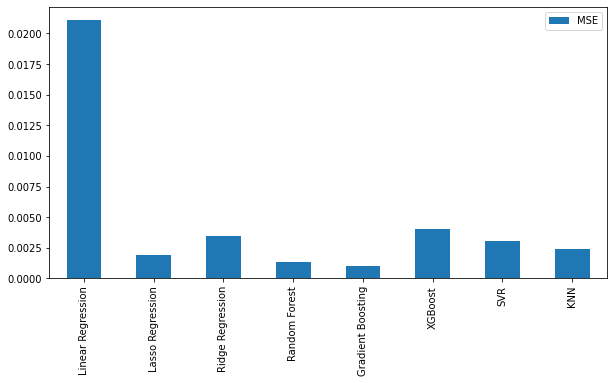

In [ ]:
result_ML.plot(kind='bar',figsize=(10, 5))